# SET-UP

In [3]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Define file patterns
directory = '/media/datadrive/arawa/Shabaz_simulation_22_04_25/figure_7_ak/exploration_data'
directory_centroids = '/media/datadrive/arawa/Shabaz_simulation_22_04_25/figure_7_ak/centroids'

patterns_my = [
    (os.path.join(directory, 'exploration_data_FinalVersion_dim128_2cells_r*.csv'), '2 cells'),
    (os.path.join(directory, 'exploration_data_FinalVersion_dim128_5cells_r*.csv'), '5 cells'),
    (os.path.join(directory, 'exploration_data_FinalVersion_dim128_10cells_r*.csv'), '10 cells'),
    (os.path.join(directory, 'exploration_data_FinalVersion_dim128_15cells_r*.csv'), '15 cells'),
    (os.path.join(directory, 'exploration_data_FinalVersion_dim128_20cells_r*.csv'), '20 cells'),
    (os.path.join(directory, 'exploration_data_FinalVersion_dim128_22cells_r*.csv'), '22 cells'),
    (os.path.join(directory, 'exploration_data_FinalVersion_dim128_25cells_r*.csv'), '25 cells'),
    (os.path.join(directory, 'exploration_data_FinalVersion_dim128_30cells_r*.csv'), '30 cells'),
    (os.path.join(directory, 'exploration_data_FinalVersion_dim128_50cells_r*.csv'), '50 cells'),
]

# valid_files = []
# for pattern, label in patterns_my:
#     for file_path in glob.glob(pattern):
#         with open(file_path, 'r') as f:
#             line_count = sum(1 for _ in f)
#         if line_count > 50000:
#             valid_files.append((file_path, label))

# patterns_my = valid_files

centroid_file_patterns = [
    (os.path.join(directory_centroids, 'centroids_FinalVersion_dim128_2cells_r*.npy'), '2 cells'),
    (os.path.join(directory_centroids, 'centroids_FinalVersion_dim128_5cells_r*.npy'), '5 cells'),
    (os.path.join(directory_centroids, 'centroids_FinalVersion_dim128_10cells_r*.npy'), '10 cells'),
    (os.path.join(directory_centroids, 'centroids_FinalVersion_dim128_15cells_r*.npy'), '15 cells'),
    (os.path.join(directory_centroids, 'centroids_FinalVersion_dim128_20cells_r*.npy'), '20 cells'),
    (os.path.join(directory_centroids, 'centroids_FinalVersion_dim128_22cells_r*.npy'), '22 cells'),
    (os.path.join(directory_centroids, 'centroids_FinalVersion_dim128_25cells_r*.npy'), '25 cells'),
    (os.path.join(directory_centroids, 'centroids_FinalVersion_dim128_30cells_r*.npy'), '30 cells'),
    (os.path.join(directory_centroids, 'centroids_FinalVersion_dim128_50cells_r*.npy'), '50 cells'),
]

# Shared configuration
PLOT_CONFIG = {
    'figsize': (10, 6),
    'dpi': 300,
    'font_sizes': {
        'title': 18,
        'axis': 16,
        'ticks': 14
    },
'Hours': {
    'ticks': [int(i * 59999 / 100) for i in range(0, 101, 10)],
    'labels': [str(i) for i in range(0, 101, 10)]
},
'time_points': {
    int(i * 59999 / 100): str(i) for i in range(0, 101, 10)
}
}

def setup_plot(title, xlabel, ylabel):
    plt.figure(figsize=PLOT_CONFIG['figsize'], dpi=PLOT_CONFIG['dpi'])
    ax = plt.gca()
    ax.set_title(title, fontsize=PLOT_CONFIG['font_sizes']['title'])
    ax.set_xlabel(xlabel, fontsize=PLOT_CONFIG['font_sizes']['axis'])
    ax.set_ylabel(ylabel, fontsize=PLOT_CONFIG['font_sizes']['axis'])
    ax.tick_params(axis='both', labelsize=PLOT_CONFIG['font_sizes']['ticks'])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    return ax

def read_data(pattern):
    return pd.concat([pd.read_csv(f) for f in glob.glob(pattern)], ignore_index=True)

def get_cell_count(filepath):
    """More specific string matching to avoid conflicts"""
    basename = os.path.basename(filepath).lower()  # Case-insensitive
    
    # Check longer patterns first to avoid conflicts
    if '_100cells_' in basename: return 100
    if '_50cells_' in basename: return 50
    if '_30cells_' in basename: return 30
    if '_25cells_' in basename: return 25
    if '_22cells_' in basename: return 22
    if '_20cells_' in basename: return 20
    if '_10cells_' in basename: return 10
    if '_15cells_' in basename: return 15
    if '_5cells_' in basename: return 5
    if '_2cells_' in basename: return 2
    if '_1cells_' in basename: return 1
    
    # Fallback check without underscores if needed
    if '100cells' in basename: return 100
    if '50cells' in basename: return 50
    if '30cells' in basename: return 30
    if '25cells' in basename: return 25
    if '22cells' in basename: return 22
    if '20cells' in basename: return 20
    if '10cells' in basename: return 10
    if '15cells' in basename: return 15
    if '5cells' in basename: return 5
    if '2cells' in basename: return 2
    if '1cells' in basename: return 1
    
    raise ValueError(f"Unexpected file name format: {filepath}")

def safe_get_fraction(data, time_point):
    """Safely get fraction explored at given time point"""
    try:
        if time_point < len(data):
            return data.iloc[time_point, -2]
        return np.nan
    except:
        return np.nan

# Total volume explored

In [9]:
def plot_data_percentage(patterns, title):
    ax = setup_plot(title, 'Hours', 'Volume Explored')
    ax.set_xticks(PLOT_CONFIG['Hours']['ticks'])
    ax.set_xticklabels(PLOT_CONFIG['Hours']['labels'])
    ax.yaxis.set_major_formatter(PercentFormatter(1, decimals=0))

    for pattern, label in patterns:
        df = read_data(pattern)
        df = df[df['Timepoint'].notna()]
        num_cells = df['Cell_ID'].nunique() if 'Cell_ID' in df.columns else None

        mean = df.groupby('Timepoint')['Fraction_Explored'].mean()
        std = df.groupby('Timepoint')['Fraction_Explored'].std()

        full_label = f"{label} (n={num_cells})" if num_cells is not None else label
        line, = plt.plot(mean.index, mean, label=full_label)
        plt.fill_between(mean.index, mean - std, mean + std, alpha=0.2, color=line.get_color())

    ax.legend(frameon=False)
    plt.show()


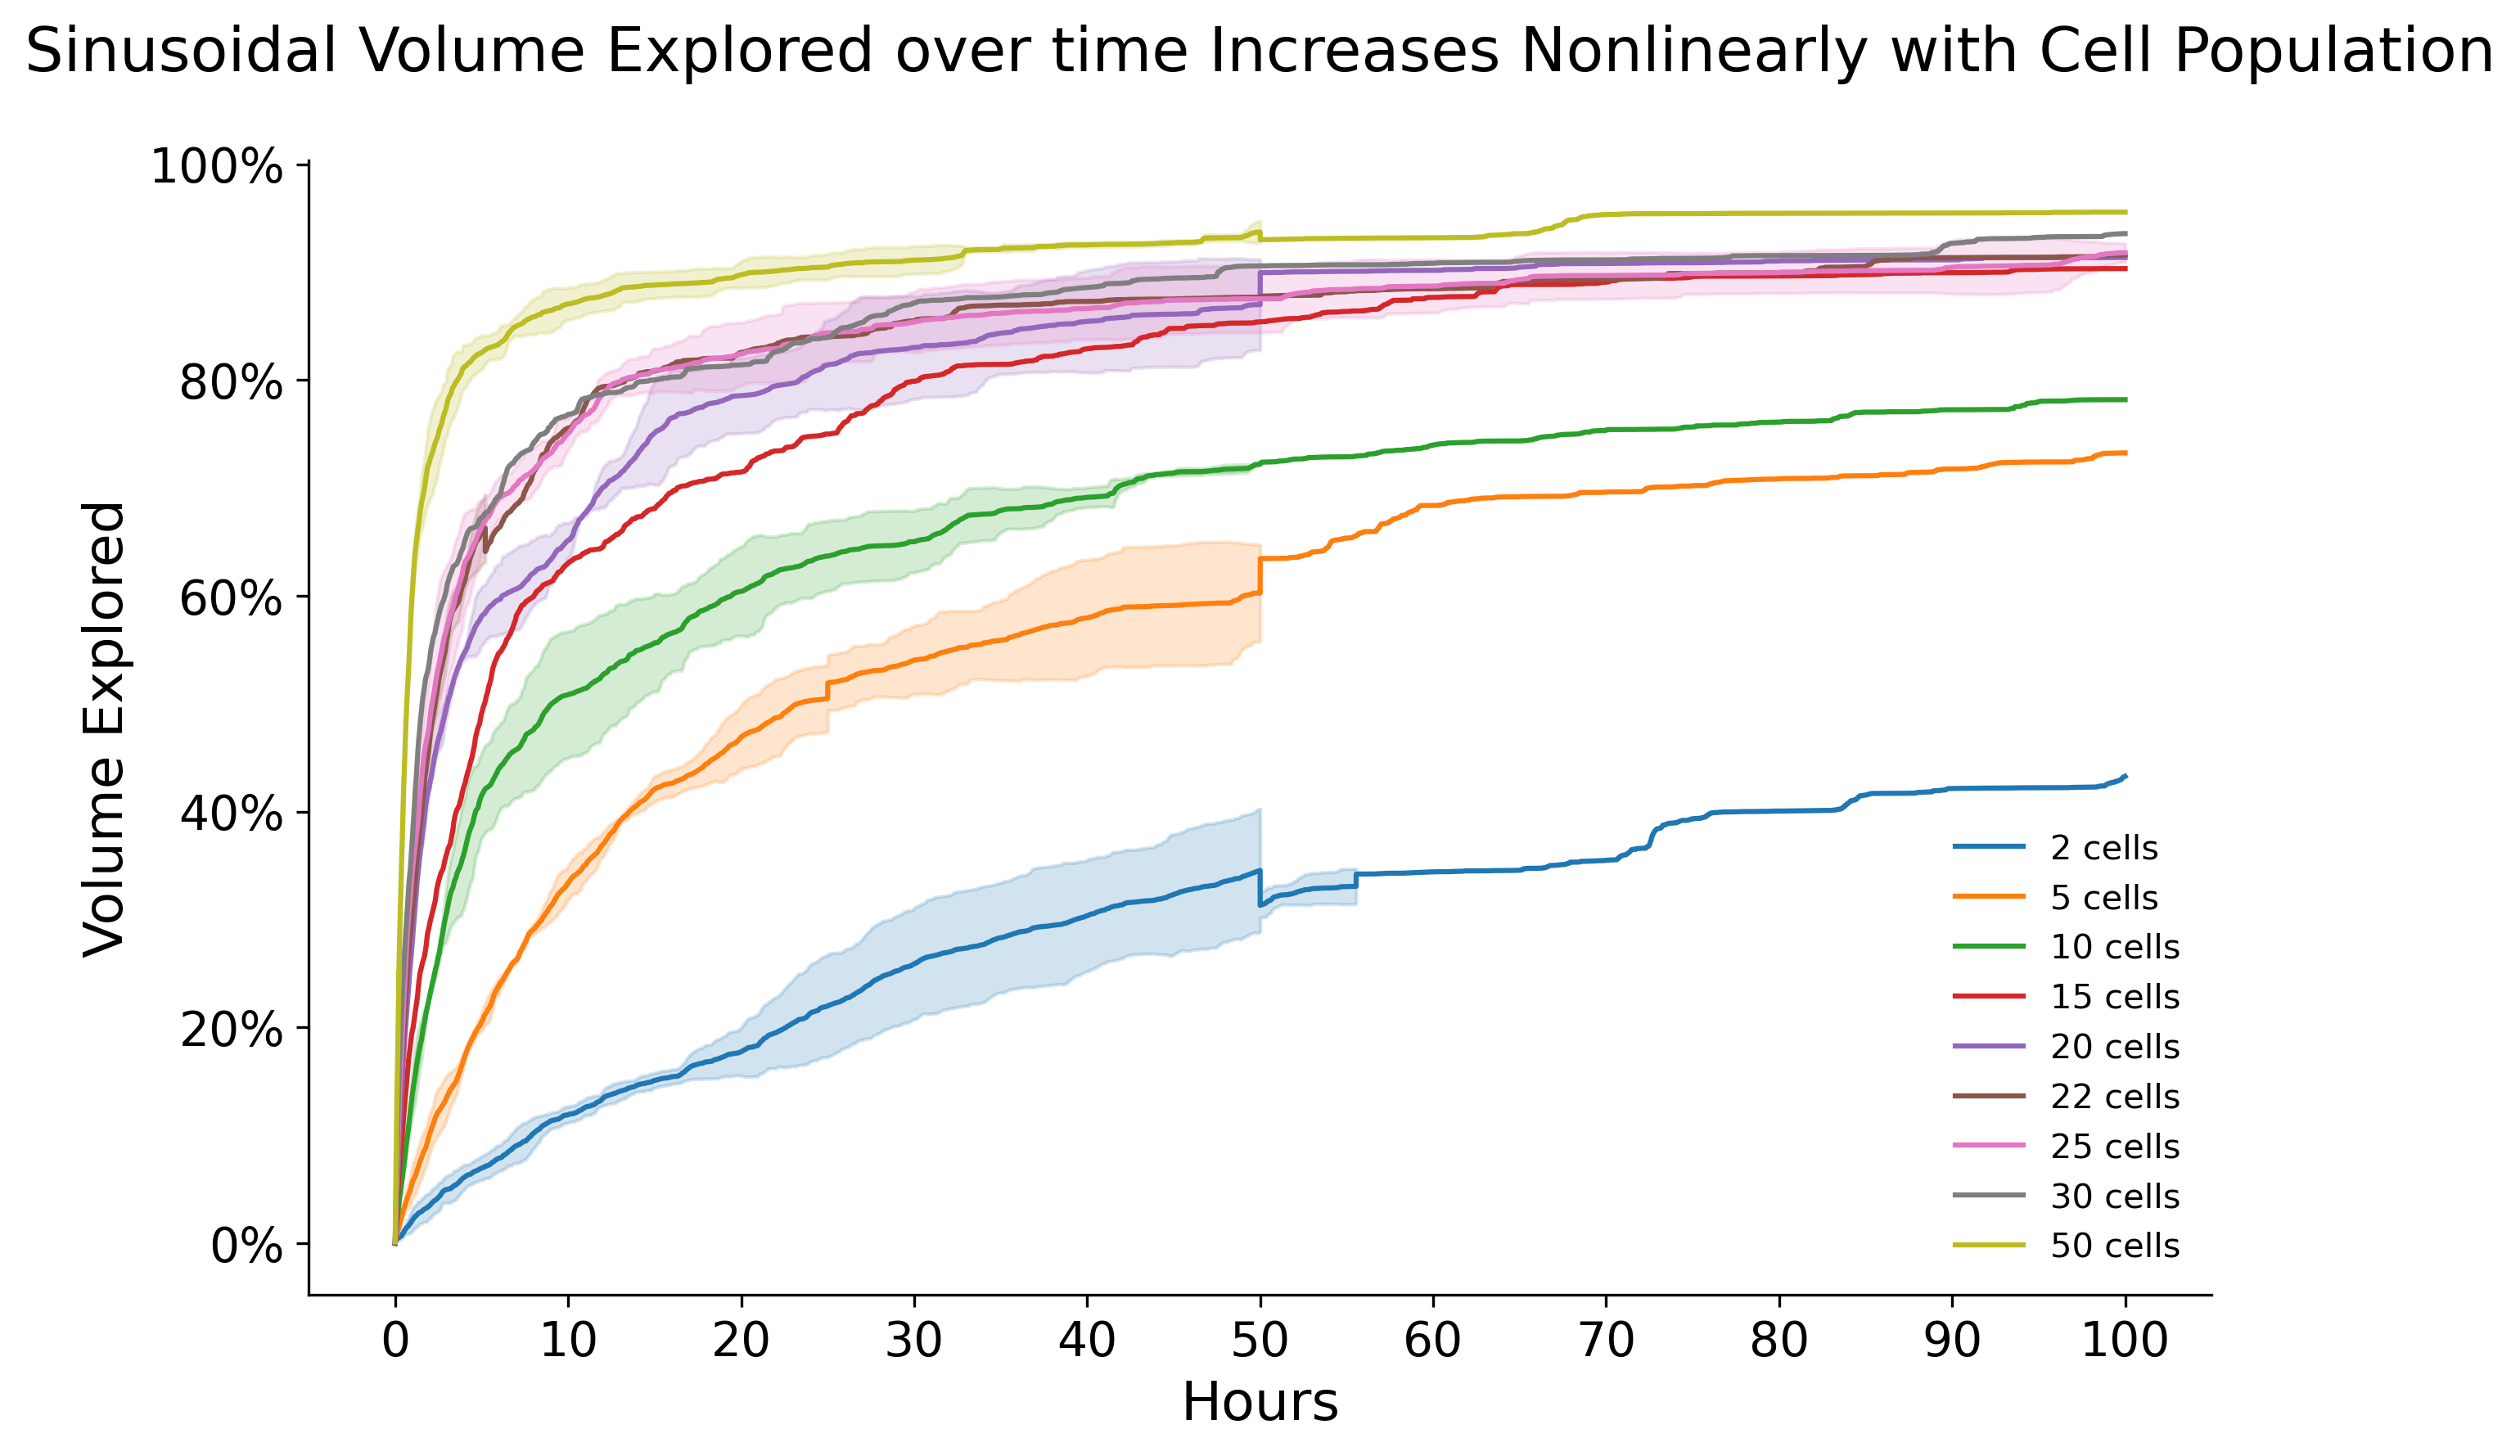

In [10]:
plot_data_percentage(patterns_my, 'Sinusoidal Volume Explored over time Increases Nonlinearly with Cell Population\n')

# Per cell volume

In [4]:
def get_fixed_timepoints(data, desired_hours=[0, 5, 10, 25, 50, 75, 100]):
    """
    Given a DataFrame, return indices corresponding to specific hour marks if they exist.
    """
    total_points = len(data)
    one_hour_timesteps = 599.99  
    total_hours = total_points / one_hour_timesteps  
    
    indices = []
    time_labels = []
    
    for hour in desired_hours:
        # Calculate the expected index for this hour
        target_idx = int(hour * one_hour_timesteps)
        
        # If this hour exists in our data
        if target_idx < total_points:
            indices.append(target_idx)
            time_labels.append(f'{hour}')
    
    return indices, time_labels

def plot_explored_space_per_cell_fixed(patterns, title):
    ax = setup_plot(title, 'Number of Cells per Simulation', 
                    'Newly Explored Volume per Cell (%)')
    x_positions = np.arange(9) * 0.1

    # Store all means AND stds for line connections and error bars
    plot_data = {hour: {'means': [], 'stds': []} for hour in [0, 5, 10, 25, 50, 75, 100]}
    
    # First pass: collect all data
    for hour in plot_data.keys():
        for pattern, _ in patterns:
            files = glob.glob(pattern)
            per_cell_values = []
            for f in files:
                try:
                    data = pd.read_csv(f)
                    time_indices, time_labels = get_fixed_timepoints(data)
                    current_label = f'{hour}'
                    if current_label in time_labels:
                        idx = time_labels.index(current_label)
                        row_idx = time_indices[idx]
                        value = data.iloc[row_idx, -2]
                        if not np.isnan(value):
                            per_cell_values.append(value / get_cell_count(f))
                except Exception as e:
                    print(f"Error reading file {f}: {e}")
                    continue

            if per_cell_values:
                plot_data[hour]['means'].append(np.mean(per_cell_values) * 100)
                plot_data[hour]['stds'].append(np.std(per_cell_values) * 100)
            else:
                plot_data[hour]['means'].append(np.nan)
                plot_data[hour]['stds'].append(np.nan)

    # Second pass: plot with connecting lines and error bars
    for i, hour in enumerate(plot_data.keys()):
        means = plot_data[hour]['means']
        stds = plot_data[hour]['stds']
        
        if not all(np.isnan(x) for x in means):
            # Plot error bars (now using the stored stds)
            plt.errorbar(x_positions, means, yerr=stds, fmt='o', capsize=5, 
                        label=f'{hour}', color=f'C{i}')
            
            # Connect points with lines
            valid_indices = [j for j, val in enumerate(means) if not np.isnan(val)]
            if len(valid_indices) > 1:
                plt.plot(x_positions[valid_indices], np.array(means)[valid_indices], 
                        color=f'C{i}', alpha=0.5, linestyle='--')

    ax.set_xticks(x_positions)
    ax.set_xticklabels(['2', '5', '10', '15', '20', '22', 
                       '25', '30', '50'])
    ax.set_xlim(min(x_positions) - 0.05, max(x_positions) + 0.03)
    
    if any(not all(np.isnan(x) for x in plot_data[hour]['means']) for hour in plot_data.keys()):
        plt.legend(loc='upper right', bbox_to_anchor=(1, 1), borderaxespad=0.)
        plt.gca().get_legend().set_title('Simulation Hours')
        #no legend borders
        plt.setp(plt.gca().get_legend().get_frame(), visible=False)
        plt.gca().figure.set_dpi(PLOT_CONFIG['dpi'])
    plt.show()


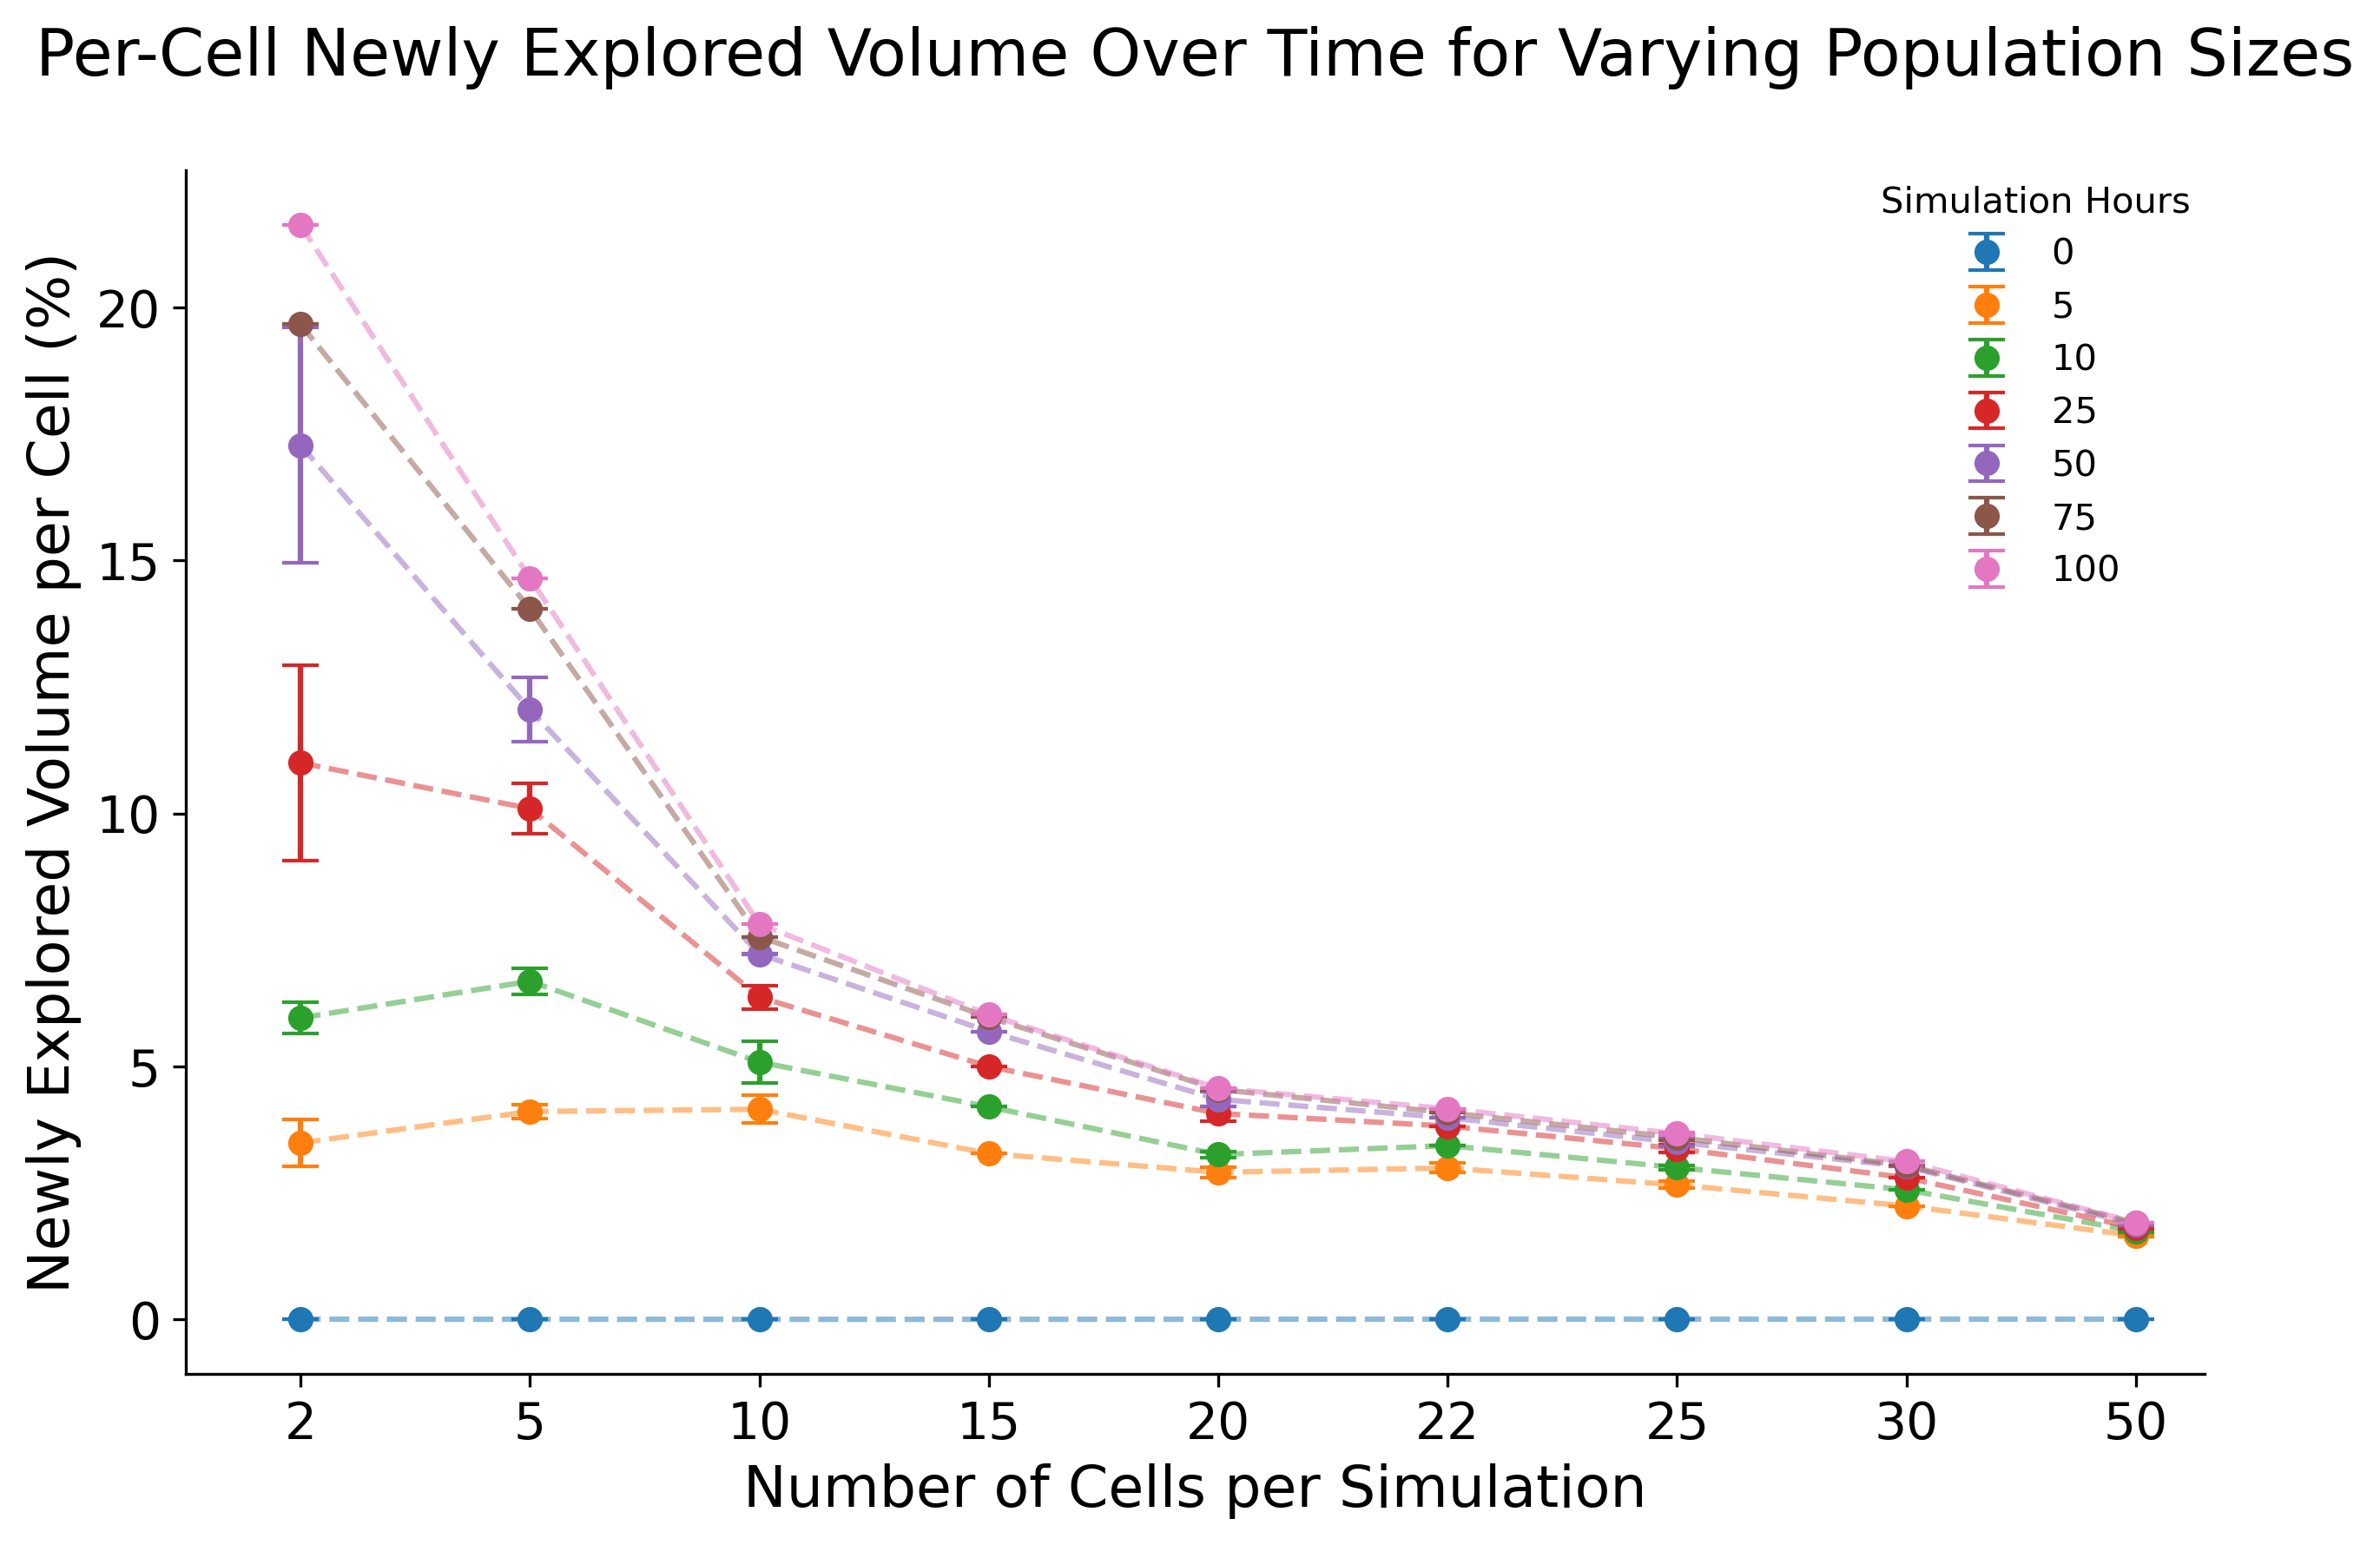

In [5]:
plot_explored_space_per_cell_fixed(patterns_my, 'Per-Cell Newly Explored Volume Over Time for Varying Population Sizes\n')

# Velocity and arrest

In [6]:
def analyze_velocity_arrest(centroid_file_patterns, velocity_threshold=2, time_interval=None):
    """Analyze cell velocities and arrest coefficients with improved error handling and plotting"""
    if time_interval is None:
        real_simulation_hours = 100
        real_simulation_minutes = real_simulation_hours * 60
        n_timepoints = 60000
        time_interval = real_simulation_minutes / n_timepoints

    # Store all data for plotting
    plot_data = {
        'velocity': {'means': [], 'stds': [], 'raw': []},
        'arrest': {'means': [], 'stds': [], 'raw': []}
    }
    labels = []

    # Check if input is labeled (pattern, label) or just patterns
    is_labeled = isinstance(centroid_file_patterns[0], (tuple, list)) and len(centroid_file_patterns[0]) == 2

    for item in centroid_file_patterns:
        pattern = item[0] if is_labeled else item
        label = item[1] if is_labeled else os.path.basename(pattern).split('_')[5] + " cells"
        
        centroid_files = glob.glob(pattern)
        labels.append(label)

        if not centroid_files:
            print(f"No files found for pattern: {pattern}")
            plot_data['velocity']['means'].append(np.nan)
            plot_data['velocity']['stds'].append(np.nan)
            plot_data['arrest']['means'].append(np.nan)
            plot_data['arrest']['stds'].append(np.nan)
            continue

        velocities = []
        arrest_coeffs = []

        for centroid_file in centroid_files:
            try:
                centroids_all = np.load(centroid_file)
                mask_valid_cells = ~np.isnan(centroids_all).any(axis=(0, 2))
                centroids_all = centroids_all[:, mask_valid_cells, :]

                if centroids_all.shape[1] <= 1:  # Skip if not enough valid cells
                    continue

                # Calculate velocities
                n_timepoints, n_cells, _ = centroids_all.shape
                cell_velocities = np.zeros((n_timepoints - 1, n_cells))
                
                for t in range(1, n_timepoints):
                    delta = centroids_all[t] - centroids_all[t - 1]
                    cell_velocities[t - 1] = np.linalg.norm(delta, axis=1) / time_interval

                cell_velocities = np.nan_to_num(cell_velocities)
                velocities_ex0 = cell_velocities[:, 1:]  # Exclude cell 0

                if velocities_ex0.size == 0:
                    continue

                # Store results for this file
                velocities.append(np.mean(velocities_ex0))
                arrest_coeffs.append(np.mean(velocities_ex0 < velocity_threshold))

            except Exception as e:
                print(f"Error processing {centroid_file}: {str(e)}")
                continue

        # Store aggregated results
        if velocities:
            plot_data['velocity']['means'].append(np.mean(velocities))
            plot_data['velocity']['stds'].append(np.std(velocities) if len(velocities) > 1 else 0)
            plot_data['velocity']['raw'].append(velocities)
            
            plot_data['arrest']['means'].append(np.mean(arrest_coeffs) * 100)
            plot_data['arrest']['stds'].append(np.std(arrest_coeffs) * 100 if len(arrest_coeffs) > 1 else 0)
            plot_data['arrest']['raw'].append(arrest_coeffs)
        else:
            print(f"Warning: No valid data for pattern: {pattern}")
            plot_data['velocity']['means'].append(np.nan)
            plot_data['velocity']['stds'].append(np.nan)
            plot_data['arrest']['means'].append(np.nan)
            plot_data['arrest']['stds'].append(np.nan)

    # --- Enhanced Plotting ---
    x_positions = np.arange(len(labels))

    # Velocity Plot
    plt.figure(figsize=(12, 6))
    for i, (mean, std) in enumerate(zip(plot_data['velocity']['means'], plot_data['velocity']['stds'])):
        if not np.isnan(mean):
            plt.errorbar(x_positions[i], mean, yerr=std, fmt='o', capsize=5, 
                        color='black', label=labels[i])
    
    # Connect valid points with lines
    valid_idx = [i for i, val in enumerate(plot_data['velocity']['means']) if not np.isnan(val)]
    if len(valid_idx) > 1:
        plt.plot(x_positions[valid_idx], np.array(plot_data['velocity']['means'])[valid_idx], 
                '--', alpha=0.5, color='gray')
    
    plt.xlabel('Number of cells', fontsize=16)
    plt.xticks(x_positions, labels, fontsize=14)
    plt.ylabel('Average Velocity (μm/min)', fontsize=16)
    plt.title('Cell Velocity Positively Correlates with Cell Number ', fontsize=18)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.tight_layout()
    plt.gca().dpi = 300
    plt.show()

    # Arrest Coefficient Plot
    plt.figure(figsize=(12, 6))
    for i, (mean, std) in enumerate(zip(plot_data['arrest']['means'], plot_data['arrest']['stds'])):
        if not np.isnan(mean):
            plt.errorbar(x_positions[i], mean, yerr=std, fmt='o', capsize=5, 
                        color='black', label=labels[i])
    
    # Connect valid points with lines
    valid_idx = [i for i, val in enumerate(plot_data['arrest']['means']) if not np.isnan(val)]
    if len(valid_idx) > 1:
        plt.plot(x_positions[valid_idx], np.array(plot_data['arrest']['means'])[valid_idx], 
                '--', alpha=0.5, color='gray')
    
    plt.xlabel('Number of cells', fontsize=16)
    plt.xticks(x_positions, labels, fontsize=14)
    plt.ylabel('Arrest Coefficient (%)', fontsize=16)
    plt.title('Arrest Coefficient Inversely Correlates with Cell Number', fontsize=18)
    plt.tight_layout()
    #remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().dpi = 300
    plt.show()

    return plot_data

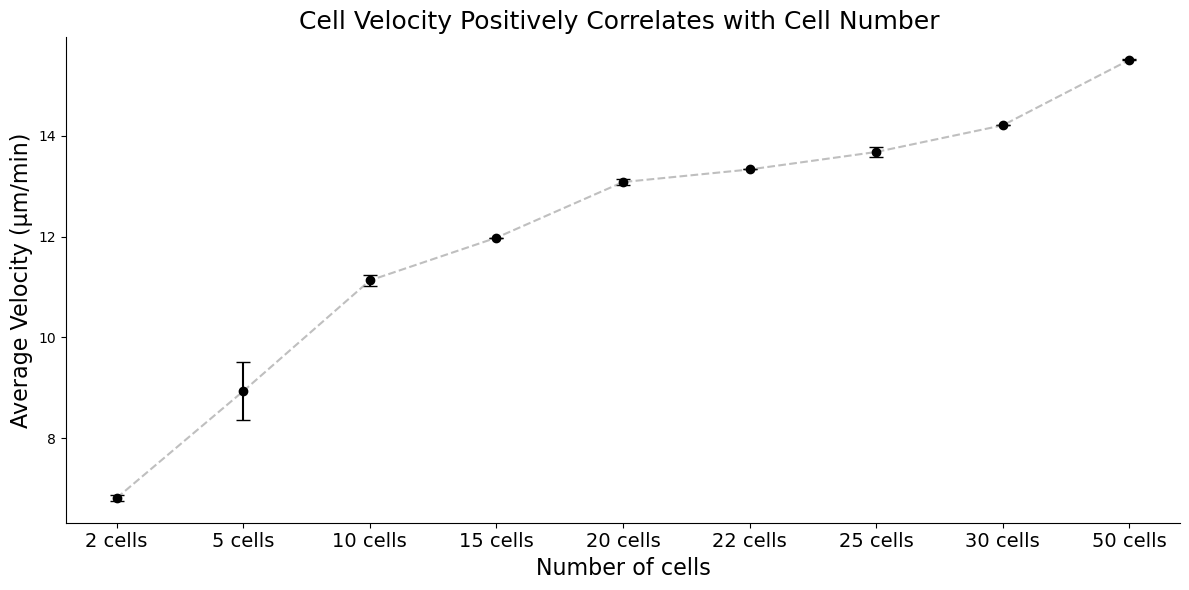

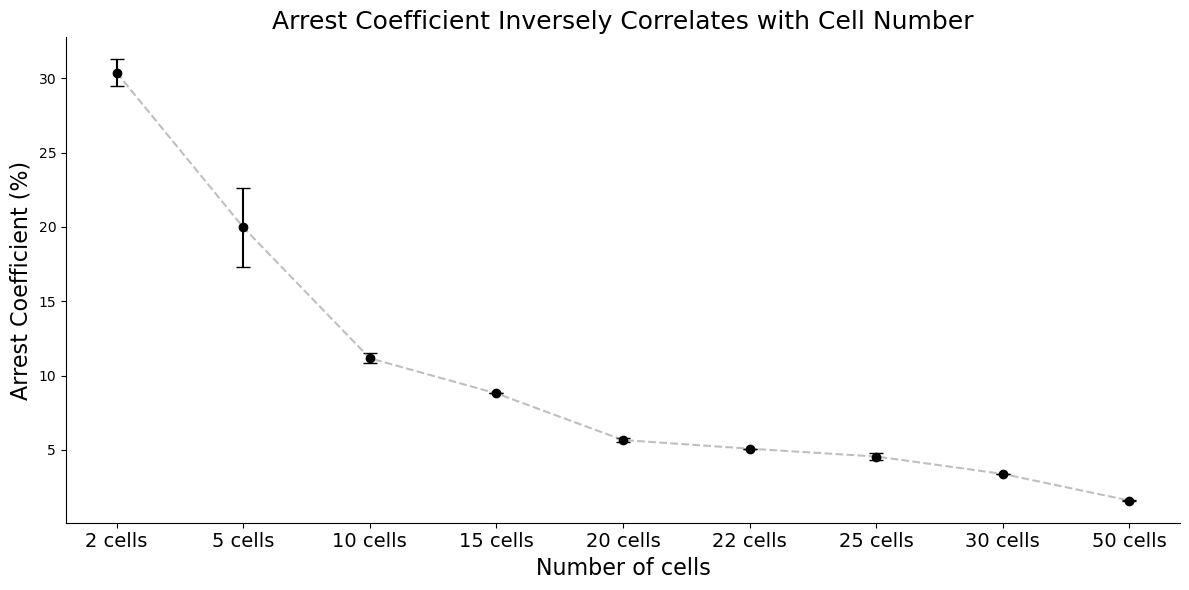

{'velocity': {'means': [6.811362543955836,
   8.931145672816866,
   11.128450535120372,
   11.977052502199555,
   13.08124730281056,
   13.330817528086952,
   13.678053678505517,
   14.207355750209224,
   15.505430749739698],
  'stds': [0.05254848234159005,
   0.5754104550061871,
   0.10940370099450902,
   0,
   0.0630312731392948,
   0,
   0.09975013076069406,
   0,
   0.009811347566195394],
  'raw': [[6.758814061614245, 6.863911026297425],
   [9.506556127823053, 8.355735217810679],
   [11.019046834125863, 11.237854236114881],
   [11.977052502199555],
   [13.018216029671265, 13.144278575949855],
   [13.330817528086952],
   [13.578303547744824, 13.777803809266212],
   [14.207355750209224],
   [15.495619402173503, 15.515242097305894]]},
 'arrest': {'means': [30.372433410352496,
   19.96860199539499,
   11.16379479773531,
   8.799432371491905,
   5.664177977681943,
   5.080957698501324,
   4.555249531936643,
   3.3846541120512925,
   1.5946656422601333],
  'stds': [0.8919420688301399,
  

In [7]:
analyze_velocity_arrest(centroid_file_patterns, velocity_threshold=2, time_interval=None)